# POLYNOMIAL REGRESSION 
Importing Liberaries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

    TV      Sales
0    0  -0.540402
1    1   0.868902
2    2   0.559570
3    3   0.499915
4    4   1.867237
..  ..        ...
95  95  12.365775
96  96  11.441391
97  97  10.742008
98  98  11.886744
99  99  11.209777

[100 rows x 2 columns]


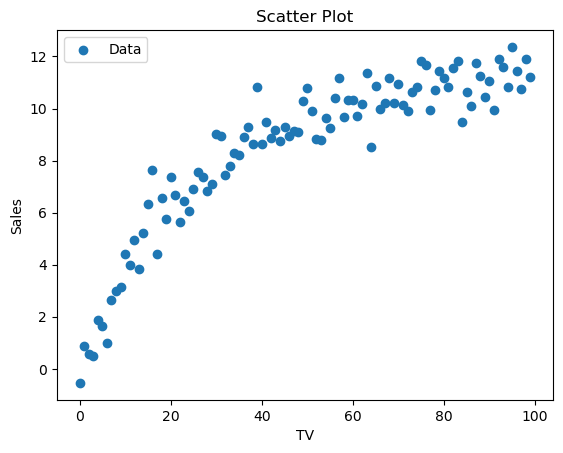

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(20160227)

# Data Generation
TV = np.arange(0, 100)
Sales = ((np.random.uniform(10, 20) * TV) / (np.random.uniform(0, 70) + TV)) + np.random.normal(0, 0.8, size=100)

data = pd.DataFrame({'TV': TV, 'Sales': Sales})
print(data)

# Plotting the Scatter Plot
plt.scatter(TV, Sales, label="Data")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.title("Scatter Plot")
plt.show()


# Dataset Preparation for the linear regression modeling

In [4]:
X=data['TV'].values.reshape(-1,1)
Y=data['Sales'].values.reshape(-1,1)

In [5]:
type(X)

numpy.ndarray

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100)

In [7]:
X_train.shape

(70, 1)

# Polynomial Regression Curve Fitiing

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_f=PolynomialFeatures(degree=2)
X_train_poly=poly_f.fit_transform(X_train)
X_test_poly=poly_f.fit_transform(X_test)

poly_reg=LinearRegression()
poly_reg.fit(X_train_poly, y_train)
predicted=poly_reg.predict(X_test_poly)

# Prediction

In [9]:
#Make predictions on the test set
# y_pred=model.predict(X_test)

# Evaluation on Training data X with predicted

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, predicted)
MSE = mean_squared_error(y_test, predicted)
print('Mean Absolute Error (MAE): ', MAE)
print('Mean Squared Error (MSE): ', MSE)

Mean Absolute Error (MAE):  0.6078972145911479
Mean Squared Error (MSE):  0.5490697525283146


# Plotting

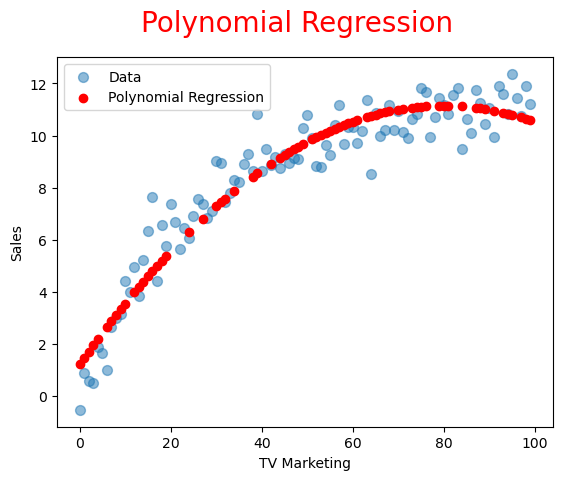

In [11]:
#Visualize the data and the linear regression line
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.scatter(X_train, poly_reg.predict(X_train_poly), color='red', label='Polynomial Regression')
plt.xlabel('TV Marketing')
plt.ylabel('Sales')
plt.legend()
plt.suptitle('Polynomial Regression', fontsize=20, color='r')
plt.show()